In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !tar -xvf /content/drive/MyDrive/moic-ai/Training/train_원천데이터.tar

In [1]:
!git clone https://github.com/FinDit-develop/FinDit-visionAI.git

Cloning into 'FinDit-visionAI'...
remote: Enumerating objects: 1587, done.
remote: Counting objects: 100% (1587/1587), done.
remote: Compressing objects: 100% (1549/1549), done.
remote: Total 1587 (delta 44), reused 1573 (delta 33), pack-reused 0
Receiving objects: 100% (1587/1587), 47.62 MiB | 35.13 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
# ! pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
from IPython.display import Image

In [4]:
from google.colab.patches import cv2_imshow

In [9]:
from IPython.display import YouTubeVideo, display

## Video 에서 Frame 추출


In [3]:
def video_to_frame(video_path, size, num_frame):
    cap = cv2.VideoCapture(video_path)
    total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sel_ind = np.linspace(0, total_frame-1, num_frame).astype("int")

    num=0
    frames = []
    for i in range(total_frame):
        if i in sel_ind:
            res, frame = cap.read()

            frame = cv2.resize(frame, size, interpolation = cv2.INTER_CUBIC)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)
        else:
            res = cap.grab()

        
    cap.release()
    frames = np.asarray(frames)

    return frames

In [5]:
arg_img_size = (128, 128)
arg_dense_sift = True
args_local_cluster = 200
args_global_cluster = 200
num_frame = 5
args_aggr = "vlad"
pca_vlad = 128

In [7]:
vid = cv2.imread("/content/test_video1.mov")
vid

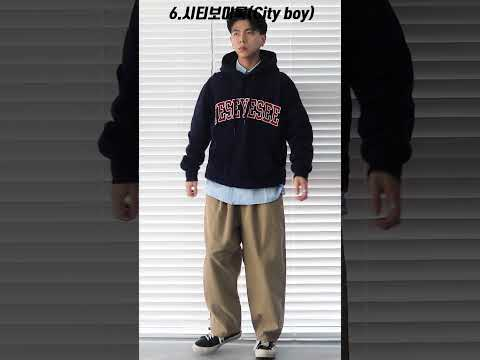

In [12]:
video = YouTubeVideo("MkYl8uYr2Kc", width=500)
display(video)

In [13]:
!pip install youtube-dl
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv
!youtube-dl https://www.youtube.com/watch?v=MkYl8uYr2Kc -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy test.mp4

     |████████████████████████████████| 1.9 MB 5.1 MB/s 
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,477 kB of archives.
After this operation, 13.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 2,477 kB in 1s (2,571 kB/s)
Selecting previously unselected packag

In [15]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/test.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls> 
    source src="%s" type="video/mp4">
</video>
""" % data_url)

In [16]:
video_to_frame("/content/test.mp4", arg_img_size, num_frame)

array([[[209, 209, 207, ..., 191, 191, 191],
        [215, 215, 219, ..., 197, 197, 197],
        [209, 209, 207, ..., 210, 210, 211],
        ...,
        [177, 178, 176, ..., 163, 165, 165],
        [174, 174, 174, ..., 159, 164, 164],
        [178, 174, 178, ..., 159, 165, 165]],

       [[208, 208, 205, ..., 218, 214, 218],
        [215, 215, 216, ..., 197, 195, 194],
        [209, 209, 215, ..., 201, 201, 204],
        ...,
        [179, 179, 178, ..., 165, 167, 167],
        [175, 175, 176, ..., 164, 166, 166],
        [175, 176, 178, ..., 164, 164, 165]],

       [[208, 209, 210, ..., 210, 211, 212],
        [209, 208, 210, ..., 199, 197, 195],
        [209, 209, 209, ..., 202, 202, 203],
        ...,
        [179, 180, 180, ..., 164, 166, 166],
        [177, 175, 176, ..., 163, 165, 166],
        [174, 175, 176, ..., 161, 164, 165]],

       [[208, 209, 210, ..., 206, 208, 210],
        [208, 208, 209, ..., 189, 189, 190],
        [207, 208, 207, ..., 196, 198, 197],
        ..

In [ ]:
imgfile = '/gdrive/MyDrive/cropStudy/sample.JPG'
img = cv2.imread(imgfile, cv2.IMREAD_COLOR)

#이미지 출력하기( ver. colab)
cv2_imshow(img)

## SIFT 특징점 추출 코드

In [ ]:
def computeSIFT(data, dense=False):
    x = {}
    for i in range(0, len(data)):
        if dense:
            sift = cv2.SIFT_create()
            img = data[i]
            step_size = 8
            kp = [cv2.KeyPoint(x, y, step_size) for x in range(0, img.shape[0], step_size) for y in range(0, img.shape[1], step_size)]
            kp, desc = sift.compute(img, kp)
        else:
            sift = cv2.SIFT_create()
            img = data[i]
            kp, desc = sift.detectAndCompute(img, None)
        x.update({i : desc})

    return x

## 2.OpenCV로 이미지 로드

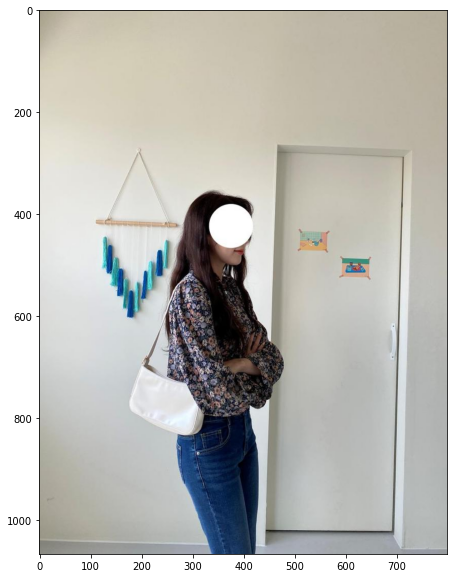

In [ ]:


default_dir = '/content/원천데이터'
img = cv2.imread(os.path.join(default_dir, '레트로/(116)IMG_1.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from PIL import Image

path = ('/content/(131)IMG_1.jpg')
im = Image.open(path)

pix = np.array(im)

In [ ]:
pix.shape

(1066, 800, 3)

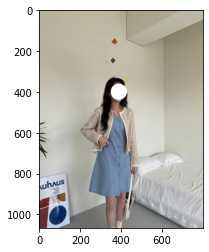

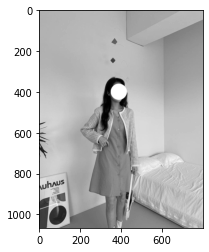

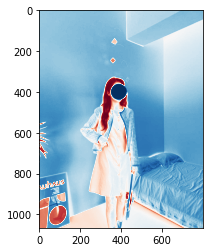

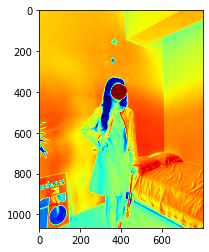

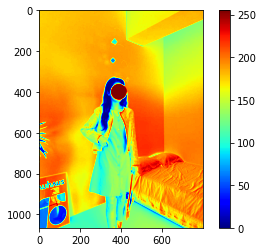

In [ ]:
plt.imshow(im)
plt.show()

#이미지 흑백으로 열기
image_pil = Image.open(path).convert("L")
image_bw = np.array(image_pil)

plt.imshow(image_bw,'gray')
plt.show()


#이미지 red, blue로 열기
plt.imshow(image_bw,'RdBu')
plt.show()

#이미지 jet로 열기
plt.imshow(image_bw,'jet')
plt.show()

#color bar 추가하기
plt.imshow(image_bw,'jet')
plt.colorbar()
plt.show()

In [ ]:
resized_image = cv2.resize(pix,(275,183))
resized_image.shape

(183, 275, 3)